# Assignment 02: Clustering
# Tousif Mahmud Emon
# ID: 1901011

## Part A: K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


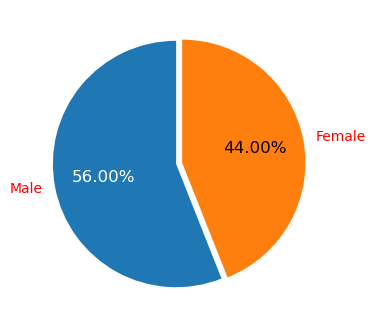

In [26]:
# Genre Calculation
values = df['Genre'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.05)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', startangle = 90, explode = explode)

plt.setp(texts, color = 'red')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

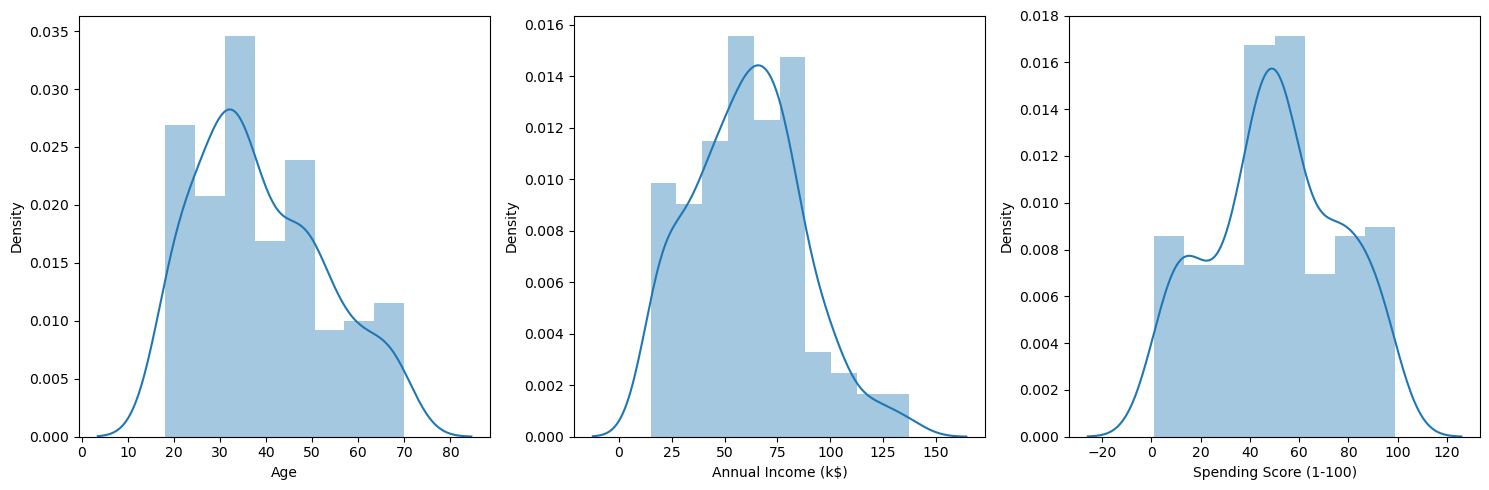

In [27]:
# distribution plots

plt.figure(figsize = (15, 5))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

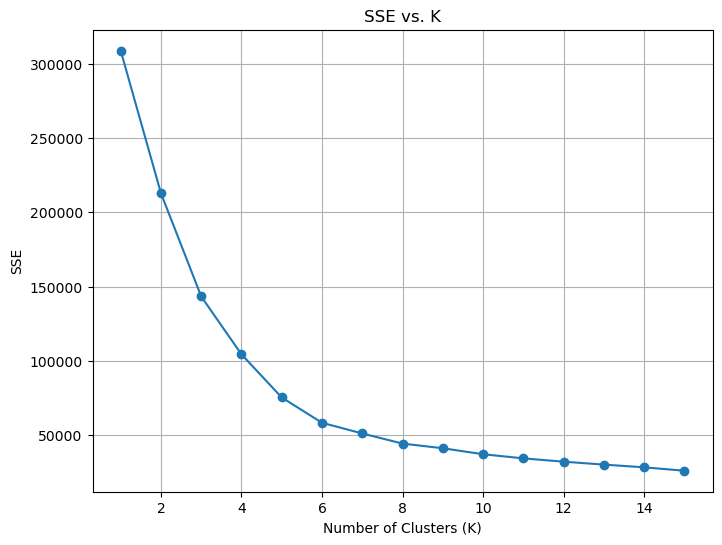

In [57]:
from sklearn.cluster import KMeans

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize an empty list to store SSE values
sse = []

# Try a range of K values (e.g., from 1 to 15)
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE value

    # Plot the SSE values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), sse, marker='o')
plt.title('SSE vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [61]:
km = KMeans(n_clusters=5)
km.fit(X)
y = km.predict(X)
X['label'] = y
X.head()

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [62]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter_3d(X, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()

# Part B: Hierarchical Clustering



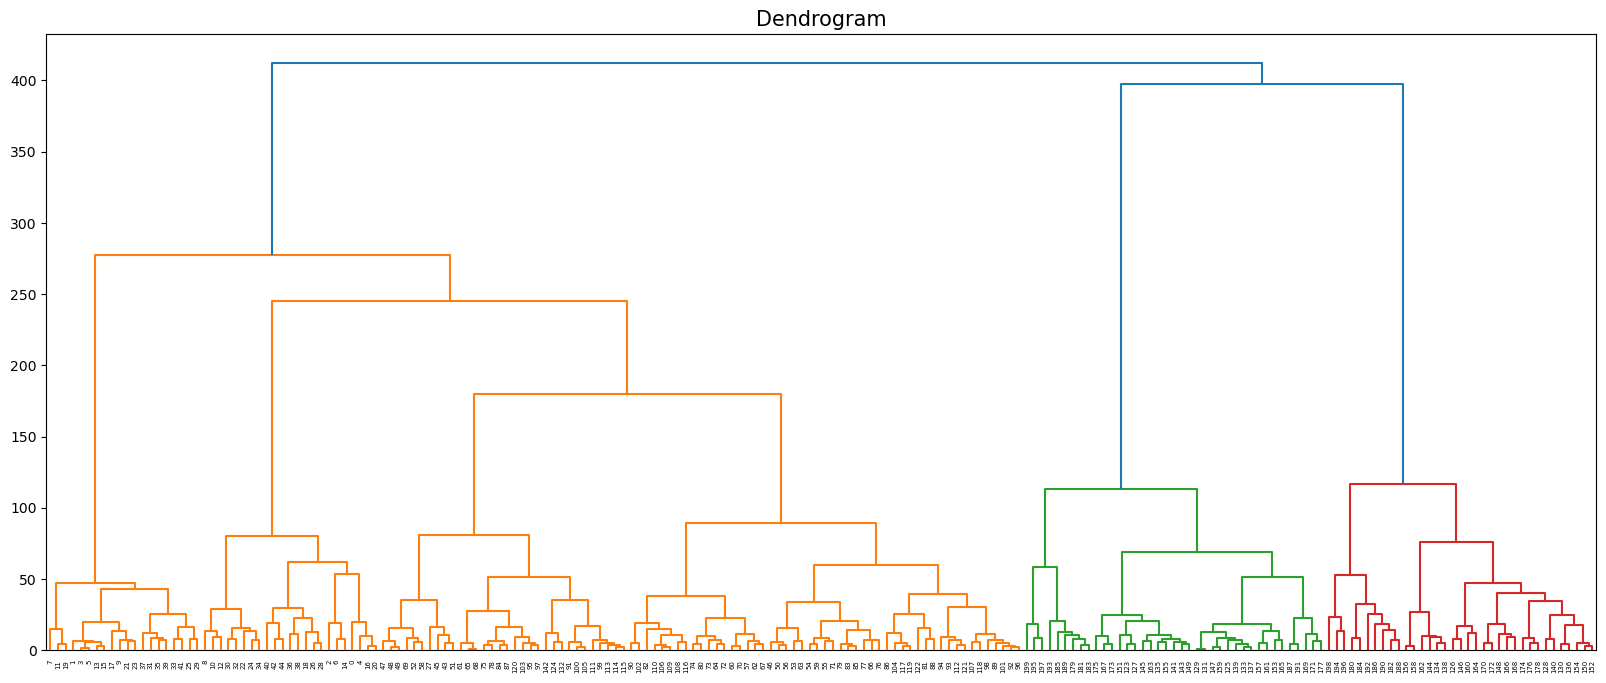

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (20, 8))

dendo = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [65]:
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = agc.fit_predict(X)

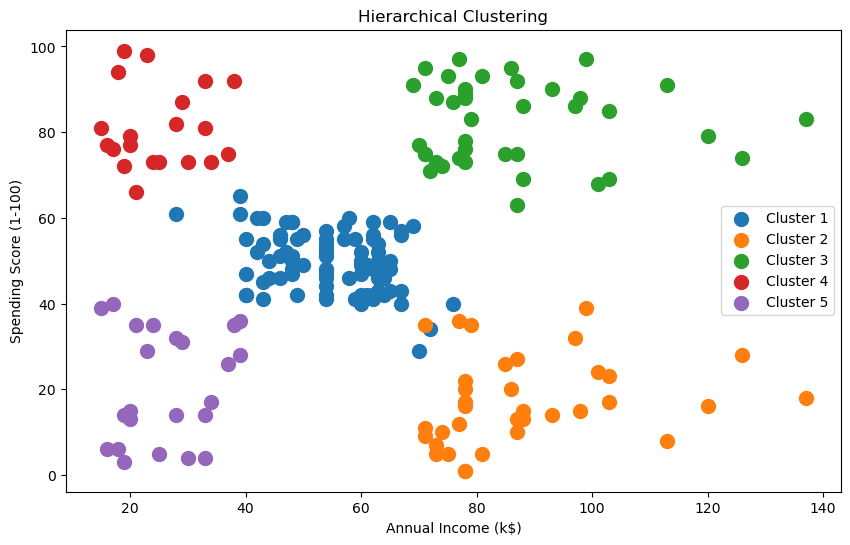

In [72]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
# Create a scatter plot for each cluster
for label in set(labels):
    plt.scatter(X[labels == label]['Annual Income (k$)'], X[labels == label]['Spending Score (1-100)'],
                label=f'Cluster {label+1}', s=100)

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Part C: Density-Based Clustering

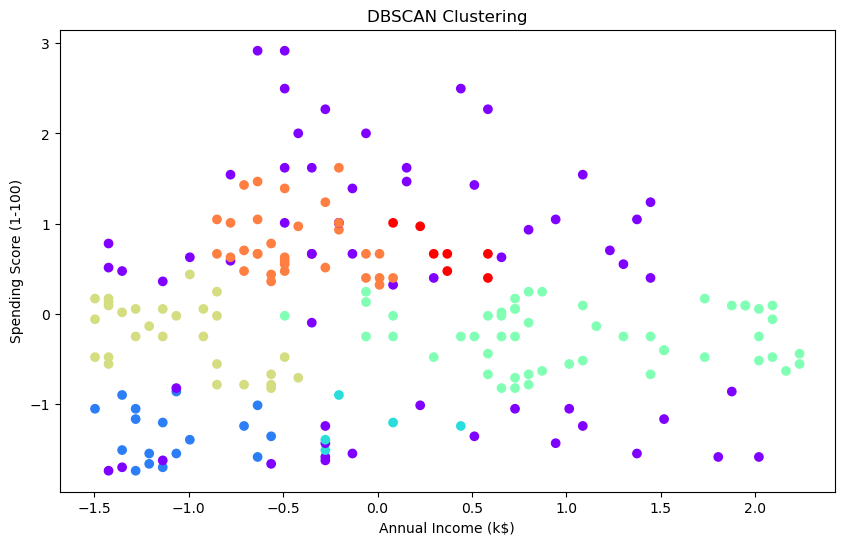

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = StandardScaler().fit_transform(X)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=.5, min_samples=5)  # You can adjust 'eps' and 'min_samples'

# Fit the DBSCAN model to your data
labels = dbscan.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
